# Ejercicio 43
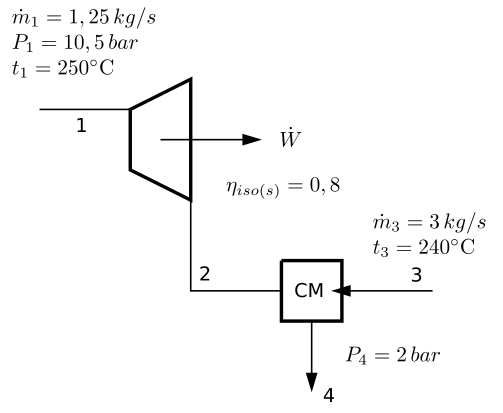
1. $\dot{W}$
2. Estado vapor 4 $(P, \, t, \, x)$
3. $\Delta S_u$

## Solución

In [ ]:
# Datos:
m_1 = 1.25 # [kg/s]
P_1 = 10.5e5 # [Pa]
T_1 = 250 + 273.15 # [K]
m_3 = 3 # [kg/s]
T_3 = 240 + 273.15 # [K]
P_4 = 2e5 # [Pa]
n_iso = 0.8

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 1.9 MB/s 


In [ ]:
P_2 = P_4
P_3 = P_4
m_2 = m_1

In [ ]:
h_1 = cp.PropsSI('H','P',P_1,'T',T_1,'Water')
s_1 = cp.PropsSI('S','P',P_1,'T',T_1,'Water')
phase_1 = cp.PhaseSI('P',P_1,'T',T_1,'Water')

In [ ]:
#@title
print('Fase en 1:',phase_1)
print('h_1 = %.2f [kJ/kg]'%(h_1/1000))
print('s_1 = %.5f [kJ/(kg·K)]'%(s_1/1000))

Fase en 1: gas
h_1 = 2941.26 [kJ/kg]
s_1 = 6.90124 [kJ/(kg·K)]


In [ ]:
s_2rev = s_1
phase_2 = cp.PhaseSI('P',P_2,'S',s_2rev,'Water')

In [ ]:
#@title
print('Fase en 2:',phase_2)

Fase en 2: twophase


Calidad del vapor en 2, reversible o ideal

$$ x_{2rev} = \frac{s_{2rev} - s'}{s'' - s'} $$

In [ ]:
sp1 = cp.PropsSI('S','P',P_2,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P_2,'Q',1,'Water')

In [ ]:
x_2rev = (s_2rev - sp1)/(sp2 - sp1)

In [ ]:
#@title
print('x_2rev = %.4f'%x_2rev)

x_2rev = 0.9597


Entalpía en 2, reversible o ideal

$$ h_{2rev} = x_{2rev} (h'' - h') + h' $$

In [ ]:
hp1 = cp.PropsSI('H','P',P_2,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_2,'Q',1,'Water')

In [ ]:
h_2rev = x_2rev*(hp2 - hp1) + hp1

In [ ]:
#@title
print('h_2rev = %.2f [kJ/kg]'%(h_2rev/1000))

h_2rev = 2617.47 [kJ/kg]


$$ \eta_{iso(s)} = \frac{\dot{W}_{real}}{\dot{W}_{ideal}} = \frac{h_1 - h_{2real}}{h_1 - h_{2rev}} $$

Entalpía en 2, real

$$ h_{2real} = h_1 - \eta_{iso} (h_1 - h_{2rev}) $$

In [ ]:
h_2 = h_1 - n_iso*(h_1 - h_2rev)

In [ ]:
#@title
print('h_2 = %.2f [kJ/kg]'%(h_2/1000))

h_2 = 2682.23 [kJ/kg]


Calidad del vapor en 2, real

$$ x_{2real} = \frac{h_{2real} - h'}{h'' - h'} $$

Entropía en 2, real

$$ s_{2real} = x_{2real} (s'' - s') + s' $$

In [ ]:
x_2 = (h_2 - hp1)/(hp2 - hp1)
s_2 = x_2*(sp2 - sp1) + sp1

In [ ]:
#@title
print('x_2 = %.4f'%x_2)
print('s_2 = %.2f [kJ/kg·K]'%s_2)

x_2 = 0.9891
s_2 = 7065.87 [kJ/kg·K]


Potencia

$$ \dot{W} = m_1 (h_1 - h_{2real}) $$

In [ ]:
W = m_1*(h_1 - h_2)

In [ ]:
#@title
print('W = %.2f [kW]'%(W/1000))

W = 323.79 [kW]


In [ ]:
T_2 = cp.PropsSI('T','P',P_2,'H',h_2,'Water')

In [ ]:
#@title
print('T_2 = %.2f [K]'%T_2)
print('t_2 = %.2f [°C]'%(T_2 - 273.15))

T_2 = 393.36 [K]
t_2 = 120.21 [°C]


In [ ]:
h_3 = cp.PropsSI('H','P',P_3,'T',T_3,'Water')

In [ ]:
#@title
print('h_3 = %.2f [kJ/kg]'%(h_3/1000))

h_3 = 2951.11 [kJ/kg]


Estado vapor en 4

$$\left\{
\begin{array}{l}
m_2 + m_3 = m_4 \\
m_2 h_2 + m_3 h_3 = m_4 h_4 
\end{array}
\right.$$

$$ m_2 h_2 + m_3 h_3 = (m_2 + m_3) h_4 $$

$$ h_4 = \frac{m_2 h_2 + m_3 h_3}{m_2 + m_3} $$

In [ ]:
h_4 = (m_2*h_2 + m_3*h_3)/(m_2 + m_3)

In [ ]:
#@title
print('h_4 = %.2f [kJ/kg]'%(h_4/1000))

h_4 = 2872.03 [kJ/kg]


In [ ]:
phase_4 = cp.PhaseSI('P',P_4,'H',h_4,'Water')

In [ ]:
#@title
print('Fase en 4:',phase_4)

Fase en 4: gas


Entonces $x_4$ no existe.

In [ ]:
T_4 = cp.PropsSI('T','P',P_4,'H',h_4,'Water')

In [ ]:
#@title
print('T_4 = %.2f [K]'%T_4)
print('t_4 = %.2f [°C]'%(T_4 - 273.15))

T_4 = 473.80 [K]
t_4 = 200.65 [°C]


Variación de entropía del universo

$$ \Delta S_u = \underbrace{ \Delta S_m }_{\equiv \, 0} + \Delta S_s $$

$$ \Delta S_u = m_4 s_4 - (m_1 s_1 + m_3 s_3 ) $$

In [ ]:
m_4 = m_2 + m_3
s_3 = cp.PropsSI('S','P',P_3,'T',T_3,'Water')
s_4 = cp.PropsSI('S','P',P_4,'T',T_4,'Water')

In [ ]:
#@title
print('s_3 = %.5f [kJ/(kg·K)]'%(s_3/1000))
print('s_4 = %.5f [kJ/(kg·K)]'%(s_4/1000))

s_3 = 7.67117 [kJ/(kg·K)]
s_4 = 7.51082 [kJ/(kg·K)]


In [ ]:
DS_u = m_4*s_4 - (m_1*s_1 + m_3*s_3)

In [ ]:
#@title
print('DS_u = %.4f [kJ/K]'%(DS_u/1000))

DS_u = 0.2809 [kJ/K]
